In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install category_encoders

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from category_encoders import TargetEncoder
from sklearn import preprocessing
from multiprocessing import Pool, cpu_count
import time
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv("/content/drive/MyDrive/ML/EX1/part2/archive.zip")

In [5]:
data.shape

(268850, 49)

In [6]:
data.isna().sum().numberOfFloors

97732

In [7]:
data.numberOfFloors.fillna(data.floor, inplace=True)

In [8]:
data.isna().sum().numberOfFloors

39942

In [9]:
data[data['numberOfFloors']<0].floor.value_counts()

-1.0    139
Name: floor, dtype: int64

In [10]:
data.isna().sum().totalRent

40517

In [11]:
data.totalRent.fillna(data.baseRent + data.heatingCosts + data.serviceCharge , inplace=True)

In [12]:
data.isna().sum().totalRent

28235

In [13]:
null_percent = pd.DataFrame(100 * data.isna().sum()/len(data))
null_percent.reset_index(inplace=True)
null_percent.rename(columns={"index": "name", 0: "percent"}, inplace=True)
null_percent

,name,percent
0,regio1,0.000000
1,serviceCharge,2.569834
2,heatingType,16.684397
3,telekomTvOffer,12.132788
4,telekomHybridUploadSpeed,83.254603
5,newlyConst,0.000000
6,balcony,0.000000
7,picturecount,0.000000
8,pricetrend,0.681421
9,telekomUploadSpeed,12.407662


In [14]:
drop_clmns = ['regio2', 'regio3', 'geo_bln', 'description', 'geo_krs', 'street', 'streetPlain', 'geo_plz', 'noRoomsRange', 'livingSpaceRange', 'condition', 'date', "firingTypes",
                   'facilities', 'yearConstructed', 'baseRentRange', 'noRoomsRange', 'picturecount', 'scoutId', 'yearConstructedRange', 'yearConstructed', 'thermalChar', 'houseNumber']

drop_clmns.extend(null_percent.name[null_percent['percent'] > 40 ].tolist())
drop_clmns

['regio2',
 'regio3',
 'geo_bln',
 'description',
 'geo_krs',
 'street',
 'streetPlain',
 'geo_plz',
 'noRoomsRange',
 'livingSpaceRange',
 'condition',
 'date',
 'firingTypes',
 'facilities',
 'yearConstructed',
 'baseRentRange',
 'noRoomsRange',
 'picturecount',
 'scoutId',
 'yearConstructedRange',
 'yearConstructed',
 'thermalChar',
 'houseNumber',
 'telekomHybridUploadSpeed',
 'noParkSpaces',
 'interiorQual',
 'petsAllowed',
 'heatingCosts',
 'energyEfficiencyClass',
 'lastRefurbish',
 'electricityBasePrice',
 'electricityKwhPrice']

In [15]:
data.drop(columns=drop_clmns, inplace=True)

In [16]:
data.shape

(268850, 19)

In [17]:
drop_index = []

drop_index.extend(data.index[data['serviceCharge'] < 0 ].tolist())
drop_index.extend(data.index[(data['floor'] > data['numberOfFloors']) & (data['numberOfFloors'] > -1)].tolist() )  
drop_index.extend(data.index[(data['balcony']==True) & (data['floor']<0)].tolist())
drop_index.extend(data.index[data['totalRent'].isnull()])

In [18]:
data.drop(index=drop_index, inplace=True)

In [19]:
data.shape

(239267, 19)

filling numeric columns

In [20]:
data.isnull().sum()

regio1                    0
serviceCharge          4073
heatingType           39051
telekomTvOffer        28268
newlyConst                0
balcony                   0
pricetrend             1666
telekomUploadSpeed    28905
totalRent                 0
hasKitchen                0
cellar                    0
baseRent                  0
livingSpace               0
lift                      0
typeOfFlat            32069
noRooms                   0
floor                 42265
numberOfFloors        32977
garden                    0
dtype: int64

In [21]:
num_values = {"serviceCharge": data.serviceCharge.mean(), "pricetrend": data.pricetrend.mean(), "telekomUploadSpeed": 0, "numberOfFloors":int(data.numberOfFloors.mean()), "floor": 1 }

data.fillna(value=num_values, inplace=True)

In [22]:
data.isnull().sum()

regio1                    0
serviceCharge             0
heatingType           39051
telekomTvOffer        28268
newlyConst                0
balcony                   0
pricetrend                0
telekomUploadSpeed        0
totalRent                 0
hasKitchen                0
cellar                    0
baseRent                  0
livingSpace               0
lift                      0
typeOfFlat            32069
noRooms                   0
floor                     0
numberOfFloors            0
garden                    0
dtype: int64

filling categorical columns

In [23]:
cat_values = {"heatingType": data.heatingType.mode()[0], "telekomTvOffer": data.telekomTvOffer.mode()[0], "typeOfFlat": data.typeOfFlat.mode()[0]}
data.fillna(value=cat_values, inplace=True)

In [24]:
data.isnull().sum()

regio1                0
serviceCharge         0
heatingType           0
telekomTvOffer        0
newlyConst            0
balcony               0
pricetrend            0
telekomUploadSpeed    0
totalRent             0
hasKitchen            0
cellar                0
baseRent              0
livingSpace           0
lift                  0
typeOfFlat            0
noRooms               0
floor                 0
numberOfFloors        0
garden                0
dtype: int64

In [25]:
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'pricetrend', 'telekomUploadSpeed',
       'totalRent', 'hasKitchen', 'cellar', 'baseRent', 'livingSpace', 'lift',
       'typeOfFlat', 'noRooms', 'floor', 'numberOfFloors', 'garden'],
      dtype='object')

In [26]:
out_cols = ['serviceCharge', 'pricetrend', 'telekomUploadSpeed', 'totalRent', 'baseRent', 'livingSpace', 'noRooms', 'floor', 'numberOfFloors']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


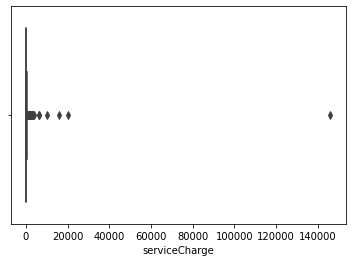

In [27]:
sns.boxplot(data['serviceCharge'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


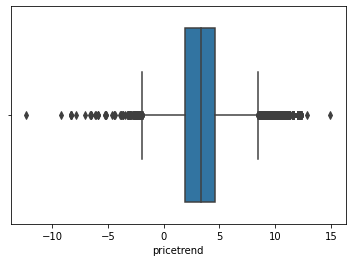

In [28]:
sns.boxplot(data['pricetrend'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


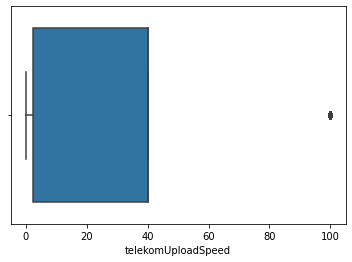

In [29]:
sns.boxplot(data['telekomUploadSpeed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


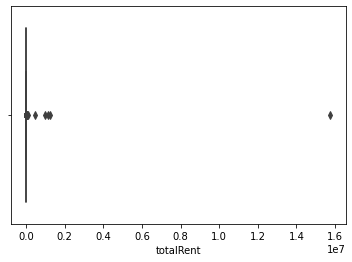

In [30]:
sns.boxplot(data['totalRent'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


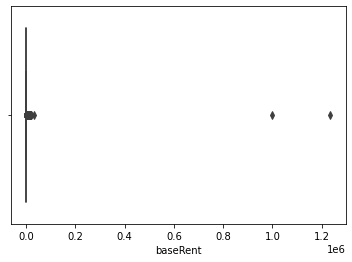

In [31]:
sns.boxplot(data['baseRent'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


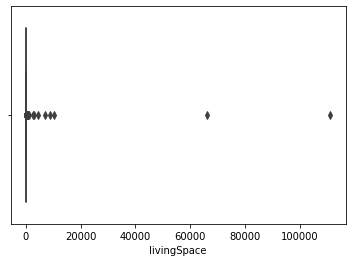

In [32]:
sns.boxplot(data['livingSpace'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


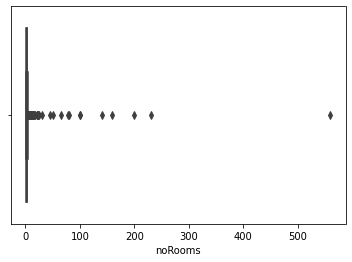

In [33]:
sns.boxplot(data['noRooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


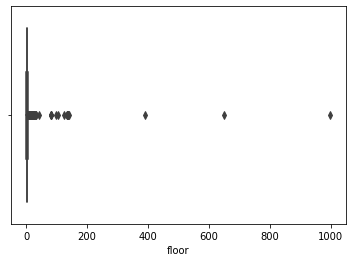

In [34]:
sns.boxplot(data['floor'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


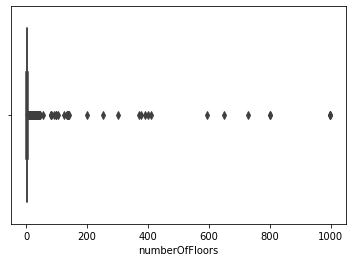

In [35]:
sns.boxplot(data['numberOfFloors'])

In [57]:
func_data = pd.DataFrame(columns=data.columns)
func_data = data.copy()

In [58]:
def del_outliers():
  for column_name in out_cols:
    Q1 = np.percentile(func_data[column_name], 25,interpolation = 'midpoint')
    Q3 = np.percentile(func_data[column_name], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    print(f'value of IQR of column {column_name} ->{IQR}')
    print(f"Shape before delete outliers of column {column_name}: {func_data.shape}")

    upper_index = func_data[func_data[column_name] >= (Q3+1.5*IQR)].index.values
    lower_index = func_data[func_data[column_name] <= (Q1-1.5*IQR)].index.values

    func_data.drop(index = upper_index, inplace=True)
    func_data.drop(index = lower_index, inplace=True)

    print(f"New Shape  after delete outliers of column {column_name}: {func_data.shape}")
    print('------------------------')

  return func_data

In [59]:
cpu_count()

2

In [60]:
s_time = time.time()
with Pool(cpu_count()) as p:
  data_multi = del_outliers()
print(f'run time : {time.time() - s_time}')

value of IQR of column serviceCharge ->86.0
Shape before delete outliers of column serviceCharge: (239267, 19)
New Shape  after delete outliers of column serviceCharge: (229812, 19)
------------------------
value of IQR of column pricetrend ->2.58
Shape before delete outliers of column pricetrend: (229812, 19)
New Shape  after delete outliers of column pricetrend: (225726, 19)
------------------------
value of IQR of column telekomUploadSpeed ->37.6
Shape before delete outliers of column telekomUploadSpeed: (225726, 19)
New Shape  after delete outliers of column telekomUploadSpeed: (225596, 19)
------------------------
value of IQR of column totalRent ->449.0
Shape before delete outliers of column totalRent: (225596, 19)
New Shape  after delete outliers of column totalRent: (215505, 19)
------------------------
value of IQR of column baseRent ->360.0
Shape before delete outliers of column baseRent: (215505, 19)
New Shape  after delete outliers of column baseRent: (211021, 19)
---------

In [63]:
func_data = pd.DataFrame(columns=data.columns)
func_data = data.copy()

In [64]:
s_time = time.time()
data = del_outliers()
print(f'run time : {time.time() - s_time}')

value of IQR of column serviceCharge ->86.0
Shape before delete outliers of column serviceCharge: (239267, 19)
New Shape  after delete outliers of column serviceCharge: (229812, 19)
------------------------
value of IQR of column pricetrend ->2.58
Shape before delete outliers of column pricetrend: (229812, 19)
New Shape  after delete outliers of column pricetrend: (225726, 19)
------------------------
value of IQR of column telekomUploadSpeed ->37.6
Shape before delete outliers of column telekomUploadSpeed: (225726, 19)
New Shape  after delete outliers of column telekomUploadSpeed: (225596, 19)
------------------------
value of IQR of column totalRent ->449.0
Shape before delete outliers of column totalRent: (225596, 19)
New Shape  after delete outliers of column totalRent: (215505, 19)
------------------------
value of IQR of column baseRent ->360.0
Shape before delete outliers of column baseRent: (215505, 19)
New Shape  after delete outliers of column baseRent: (211021, 19)
---------

In [65]:
data

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,cellar,baseRent,livingSpace,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,4.62,10.0,840.00,False,True,595.0,86.00,False,ground_floor,4.0,1.0,3.0,True
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,2.72,2.4,1300.00,False,True,965.0,83.80,True,apartment,3.0,3.0,4.0,False
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,1.53,40.0,488.38,False,False,343.0,58.15,False,other,3.0,3.0,3.0,False
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,2.46,0.0,903.00,False,False,765.0,84.97,False,apartment,3.0,1.0,1.0,False
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,False,False,1.01,2.4,380.00,False,True,310.0,62.00,False,apartment,2.0,1.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,80.00,gas_heating,ONE_YEAR_FREE,False,False,2.58,2.4,670.00,False,False,590.0,85.00,False,roof_storey,3.0,3.0,3.0,False
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,2.74,10.0,910.00,False,True,820.0,90.00,False,roof_storey,3.0,1.0,3.0,False
268846,Hessen,220.00,gas_heating,ONE_YEAR_FREE,False,True,6.49,0.0,1150.00,True,False,930.0,115.00,False,apartment,3.5,1.0,1.0,False
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,2.90,40.0,930.00,False,True,650.0,95.00,False,apartment,4.0,1.0,2.0,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


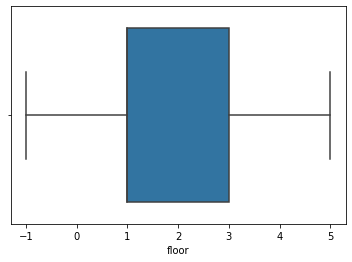

In [66]:
sns.boxplot(data['floor'])

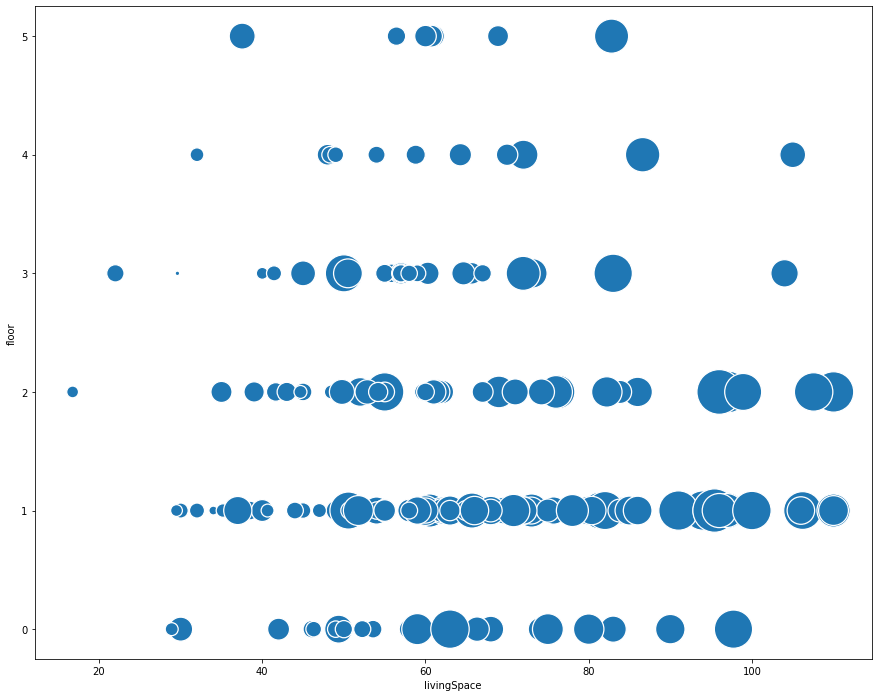

In [74]:
plt.figure(figsize=(15,12))
sample_data = data.sample(200,random_state=23)
sns.scatterplot(data=sample_data, x="livingSpace", y="floor", size="totalRent", legend=False, sizes=(20, 2000))

plt.show()

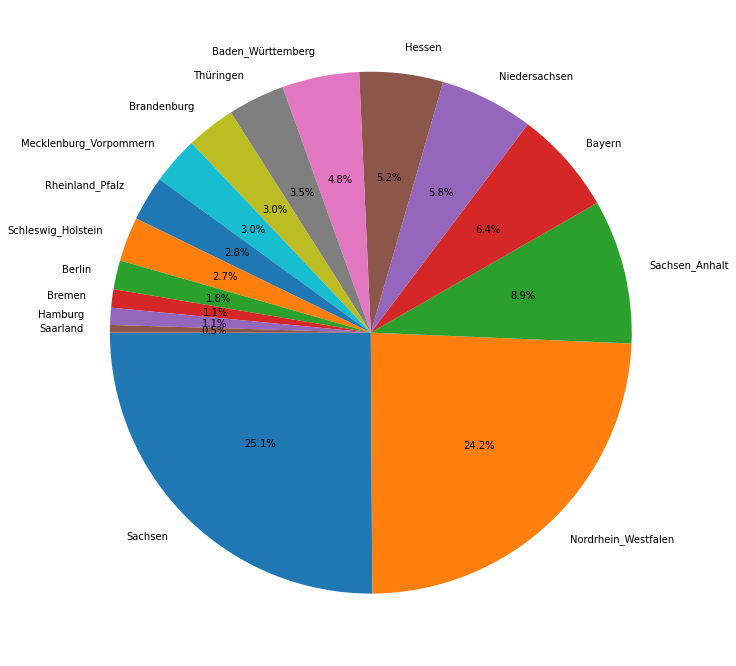

In [71]:
plt.figure(figsize=(18,12))
g = plt.pie(data.regio1.value_counts(), labels= data.regio1.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

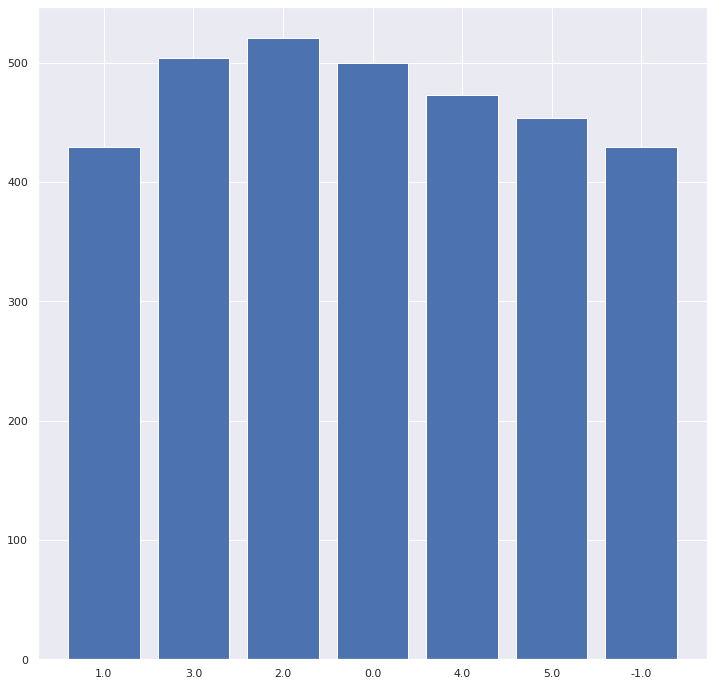

In [96]:
plt.figure(figsize=(12,12))

y_pos = np.arange(len(data.floor.unique()))
plt.bar(y_pos, data.groupby(['floor']).baseRent.mean())
plt.xticks(y_pos, data.floor.unique())
plt.show()

In [97]:
data = data.replace({True:1, False:0})

In [98]:
len(data.telekomTvOffer.unique())

3

In [99]:
le = preprocessing.LabelEncoder()

data['telekomTvoffer'] = le.fit_transform(data.telekomTvOffer)
data.drop(columns=['telekomTvOffer'], inplace=True)

In [100]:
len(data.regio1.unique())

16

In [101]:
te = TargetEncoder()
data['regio'] = te.fit_transform(data['regio1'], data['totalRent'])

In [102]:
te = TargetEncoder()
data['heatingtype'] = te.fit_transform(data['heatingType'], data['totalRent'])

In [103]:
te = TargetEncoder()
data['typeofFlat'] = te.fit_transform(data['typeOfFlat'], data['totalRent'])

In [104]:
data.drop(columns=['regio1', 'heatingType', 'typeOfFlat'], inplace=True)

In [105]:
data

,serviceCharge,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,cellar,baseRent,livingSpace,lift,noRooms,floor,numberOfFloors,garden,telekomTvoffer,regio,heatingtype,typeofFlat
0,245.00,0,0,4.62,10.0,840.00,0,1,595.0,86.00,0,4.0,1.0,3.0,1,1,676.340922,625.962021,661.081806
2,255.00,1,1,2.72,2.4,1300.00,0,1,965.0,83.80,1,3.0,3.0,4.0,0,1,516.805598,962.902160,637.329941
3,58.15,0,1,1.53,40.0,488.38,0,0,343.0,58.15,0,3.0,3.0,3.0,0,1,516.805598,604.582022,633.068787
4,138.00,0,1,2.46,0.0,903.00,0,0,765.0,84.97,0,3.0,1.0,1.0,0,1,704.810857,621.337150,637.329941
6,70.00,0,0,1.01,2.4,380.00,0,1,310.0,62.00,0,2.0,1.0,4.0,1,1,516.805598,621.337150,637.329941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,80.00,0,0,2.58,2.4,670.00,0,0,590.0,85.00,0,3.0,3.0,3.0,0,1,676.340922,684.360690,643.042335
268845,90.00,0,1,2.74,10.0,910.00,0,1,820.0,90.00,0,3.0,1.0,3.0,0,1,867.319319,978.071891,643.042335
268846,220.00,0,1,6.49,0.0,1150.00,1,0,930.0,115.00,0,3.5,1.0,1.0,0,1,876.815705,684.360690,637.329941
268847,220.00,0,1,2.90,40.0,930.00,0,1,650.0,95.00,0,4.0,1.0,2.0,1,1,876.815705,625.962021,637.329941
